<a href="https://colab.research.google.com/github/DarkKillX/MachineLearningTasks/blob/main/Final-Exam/01_pytorch_workflow_exercises_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [2]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
from torch import nn

In [3]:
# Setup device-agnostic code
# Check if CUDA (GPU support) is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Print out the device we're using
print(f"Using device: {device}")

Using device: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [4]:
import torch

# Create the data parameters
weight = 0.3
bias = 0.9

# Generate 100 data points
X = torch.linspace(0, 1, 100).unsqueeze(1)  # X values (features) - unsqueeze to add an extra dimension
y = weight * X + bias  # y values (labels) using the linear equation y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")


Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0101],
        [0.0202],
        [0.0303],
        [0.0404],
        [0.0505],
        [0.0606],
        [0.0707],
        [0.0808],
        [0.0909]])
y: tensor([[0.9000],
        [0.9030],
        [0.9061],
        [0.9091],
        [0.9121],
        [0.9152],
        [0.9182],
        [0.9212],
        [0.9242],
        [0.9273]])


In [5]:
# Determine the split size
train_size = int(0.8 * len(X))
test_size = len(X) - train_size

# Split the dataset into training and testing sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")



Training data shape: X_train: torch.Size([80, 1]), y_train: torch.Size([80, 1])
Testing data shape: X_test: torch.Size([20, 1]), y_test: torch.Size([20, 1])


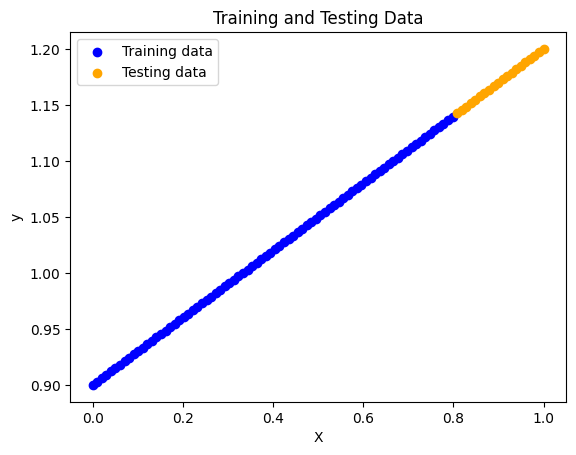

In [6]:
import matplotlib.pyplot as plt

# Plot training data in blue
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot testing data in orange
plt.scatter(X_test, y_test, color='orange', label='Testing data')

# Add title and labels
plt.title("Training and Testing Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()


## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [7]:
# Create PyTorch linear regression model by subclassing nn.Module
import torch.nn as nn

# Define the Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output

    def forward(self, x):
        return self.linear(x)

# Instantiate the model and move it to the device
model = LinearRegressionModel().to(device)


In [8]:
# Instantiate the model and put it to the target device
model = LinearRegressionModel().to(device)


Epoch: 0 | Train loss: 0.104 | Test loss: 0.142
Epoch: 20 | Train loss: 0.086 | Test loss: 0.181
Epoch: 40 | Train loss: 0.078 | Test loss: 0.178
Epoch: 60 | Train loss: 0.071 | Test loss: 0.163
Epoch: 80 | Train loss: 0.064 | Test loss: 0.147
Epoch: 100 | Train loss: 0.057 | Test loss: 0.131
Epoch: 120 | Train loss: 0.050 | Test loss: 0.116
Epoch: 140 | Train loss: 0.043 | Test loss: 0.100
Epoch: 160 | Train loss: 0.036 | Test loss: 0.084
Epoch: 180 | Train loss: 0.029 | Test loss: 0.068
Epoch: 200 | Train loss: 0.022 | Test loss: 0.052
Epoch: 220 | Train loss: 0.015 | Test loss: 0.035
Epoch: 240 | Train loss: 0.008 | Test loss: 0.018
Epoch: 260 | Train loss: 0.003 | Test loss: 0.006
Epoch: 280 | Train loss: 0.003 | Test loss: 0.006


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [9]:
# Create the loss function and optimizer
# Loss Function and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 300

for epoch in range(epochs):
    model.train()  # Put model in train mode

    # Forward pass
    y_pred = model(X_train.to(device))

    # Calculate loss
    loss = loss_fn(y_pred, y_train.to(device))

    # Zero gradients
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Step the optimizer
    optimizer.step()

    # Perform testing every 20 epochs
    if epoch % 20 == 0:
        model.eval()  # Put model in evaluation mode
        with torch.no_grad():  # Setup inference context
            test_pred = model(X_test.to(device))
            test_loss = loss_fn(test_pred, y_test.to(device))
            print(f"Epoch: {epoch} | Train loss: {loss.item():.3f} | Test loss: {test_loss.item():.3f}")


Epoch: 0 | Train loss: 0.003 | Test loss: 0.006
Epoch: 20 | Train loss: 0.003 | Test loss: 0.006
Epoch: 40 | Train loss: 0.003 | Test loss: 0.006
Epoch: 60 | Train loss: 0.003 | Test loss: 0.006
Epoch: 80 | Train loss: 0.003 | Test loss: 0.006
Epoch: 100 | Train loss: 0.003 | Test loss: 0.006
Epoch: 120 | Train loss: 0.003 | Test loss: 0.006
Epoch: 140 | Train loss: 0.003 | Test loss: 0.006
Epoch: 160 | Train loss: 0.003 | Test loss: 0.006
Epoch: 180 | Train loss: 0.003 | Test loss: 0.006
Epoch: 200 | Train loss: 0.003 | Test loss: 0.006
Epoch: 220 | Train loss: 0.003 | Test loss: 0.006
Epoch: 240 | Train loss: 0.003 | Test loss: 0.006
Epoch: 260 | Train loss: 0.003 | Test loss: 0.006
Epoch: 280 | Train loss: 0.003 | Test loss: 0.006


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

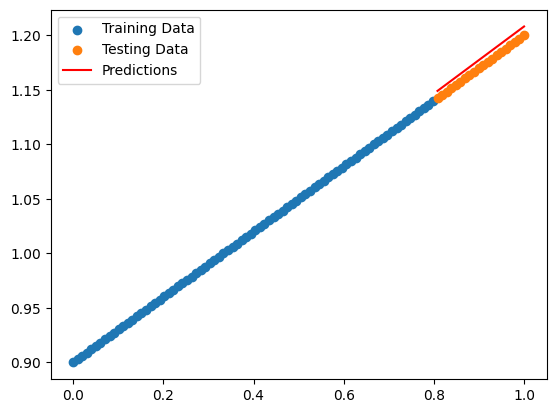

In [10]:
# Make predictions with the model
model.eval()
with torch.no_grad():
    predictions = model(X_test.to(device))

# Plot the predictions
plt.scatter(X_train.cpu(), y_train.cpu(), label='Training Data')
plt.scatter(X_test.cpu(), y_test.cpu(), label='Testing Data')
plt.plot(X_test.cpu(), predictions.cpu(), color='red', label='Predictions')
plt.legend()
plt.show()


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [17]:
# Create a directory to save the model
Path("./models").mkdir(parents=True, exist_ok=True)

# Define the model save path
model_save_path = "./models/linear_regression_model.pth"

# Save the model state dict
torch.save(model.state_dict(), model_save_path)

# Create a new instance of the model and load the saved state dict
loaded_model = LinearRegressionModel().to(device)
loaded_model.load_state_dict(torch.load(model_save_path))

# Make predictions with the loaded model
loaded_model.eval()
with torch.no_grad():
    loaded_predictions = loaded_model(X_test.to(device))

# Confirm the predictions match
assert torch.all(torch.eq(predictions, loaded_predictions)), "Loaded model predictions do not match"
